# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [15]:
library(tidyverse)
library(gvlma)

ERROR: Error in library(gvlma): there is no package called 'gvlma'


# Assignment 1


## Data

The data are given:


In [16]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

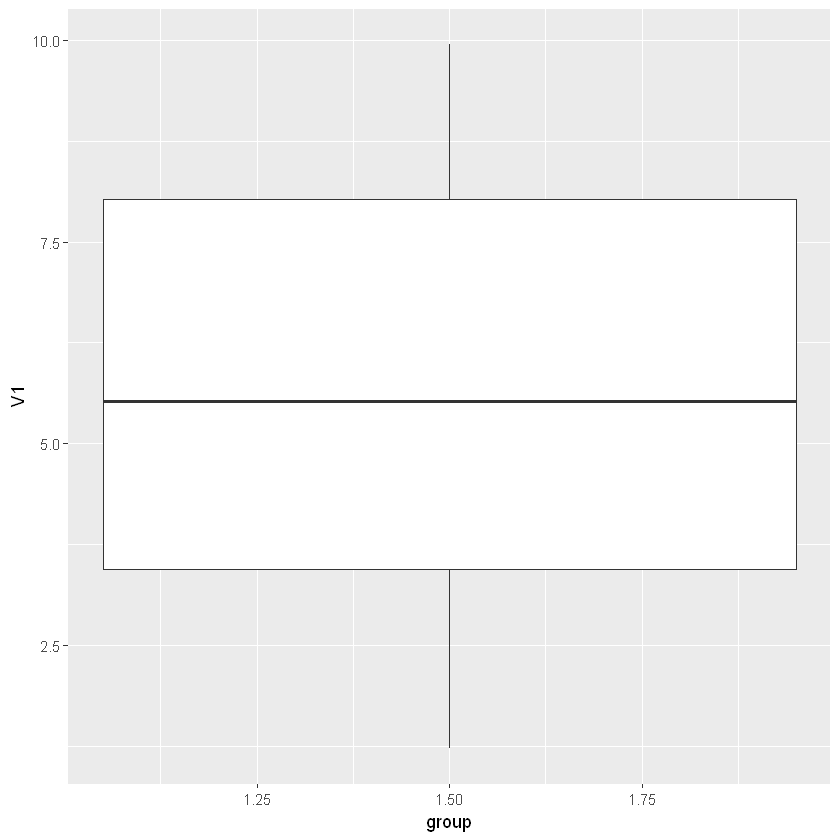

In [17]:
library(ggplot2)

p <- ggplot(df1 , aes(x = group, y = V1)) + geom_boxplot()
p

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [18]:
reg1 <- lm(df1$V1 ~ df1$response)
summary(reg1)

#gvmodel.del <- deletion.gvlma(gvmodel)
#summary(gvmodel.del)


Call:
lm(formula = df1$V1 ~ df1$response)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38273 -0.50585 -0.04045  0.68125  1.80675 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.88469    0.23964   7.865 3.53e-10 ***
df1$response -0.46018    0.02437 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9219 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [19]:
test_linear_regression <- gvlma(reg1)
summary(test_linear_regression)

#All assumptions are acceptable, with a level of significance of 0.05.

ERROR: Error in gvlma(reg1): could not find function "gvlma"


## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



In [ ]:
ggplot(df1, aes(x=V1, y=response)) + geom_point() + geom_smooth(method=lm, color = 'red')

# Assigment 2

# Packages

In [ ]:
library(thematicmaps)
library(tidyverse)

## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [ ]:
map_municipal <- read.csv("nld_municipal_map.csv", head = T, sep = ";")
head(map_municipal)

## Assignment 2b

Now you can make an empty map of the Netherlands.

In [ ]:
mapPlot <- MapPlot()
coordinateData <- data.frame(map_municipal$id, map_municipal$x, map_municipal$y)
colnames(coordinateData) <- c("id", "X", "Y")

AddPointsLayer(mapplot, coordinateData)

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [20]:
pc4_locations <- read.csv("nld_pc4_locations.csv", head = T, sep = ";")

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [21]:
schools <- read.csv("schools.csv", head = T, sep = ";")

leest de csv in seperated by ;

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [22]:
schools1 <- schools %>%
    mutate(PC4 = substr(POSTCODE, 1,4)) %>%
    select(PC4, DENOMINATIE) %>%
    mutate(PC4 = as.integer(PC4))

head(schoolsl)
str(schoolsl)

ERROR: Error in head(schoolsl): object 'schoolsl' not found


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [23]:
school_loc = merge(pc4_locations, transform(schools1, POSTCODE = substr(schools1[,8],0,4)), by.x = "PC4", by.y = "POSTCODE" )school_loc[school_loc$DENOMINATIE == 'Rooms-Katholiek' | school_loc$DENOMINATIE == 'Protestants-Christelijk',] 
subset(school_loc, DENOMINATIE == "Rooms-Katholiek" | DENOMINATIE == "Protestants-Christelijk")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:126: unexpected symbol
1: school_loc = merge(pc4_locations, transform(schools1, POSTCODE = substr(schools1[,8],0,4)), by.x = "PC4", by.y = "POSTCODE" )school_loc
                                                                                                                                 ^


joint de twee datatables op PC4 van pc4_locations en POSTCODE van schools1

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


End of notebook